# Sheafy CNN test notebook

In this notebook I will develop and test a new CNN architecture inspired in cellular sheaves (but in reality, not sheafy at all)

Author Vicente Gonzalez Bosca (vicenteg@sas.upenn.edu)

Last updated 14th December 2024

In [1]:
# open libraries
import sympy as sp
# import own classes an functions (and more open libraries)
from SCNN import *

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)

We will test this on the simplest dataset possible, MNIST

In [3]:
# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST specific mean and std
])

In [4]:
# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train=False,
    download=True,
    transform=transform
)

In [5]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [6]:
# Print dataset information
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")

Training set size: 60000
Test set size: 10000
Image shape: torch.Size([1, 28, 28])


Image shape: (28, 28)

Pixel value range:
Min value: -0.424
Max value: 2.821
Mean value: 0.023


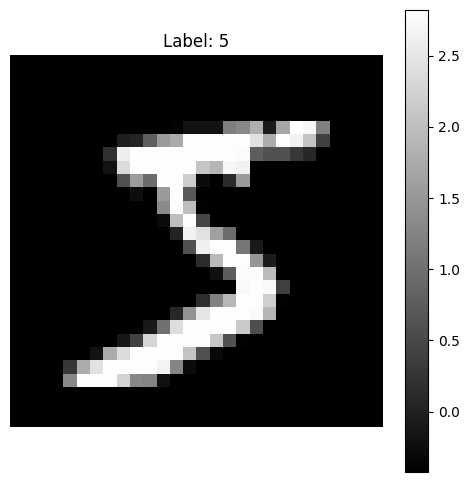

In [7]:
# Display the first image from the training set
show_single_image(train_dataset)

We create regular CNNs present in the literature and check all the function definitions work

In [8]:
# Example usage with different configurations:

# Original 2-layer configuration
model_original = MNISTConvNet(
    conv_channels=[32, 64],
    fc_features=[512]
)

# Deeper model with 3 conv layers
model_deep = MNISTConvNet(
    conv_channels=[32, 64, 128],
    fc_features=[1024, 512]
)

# Shallow model with 1 conv layer
model_shallow = MNISTConvNet(
    conv_channels=[32],
    fc_features=[256]
)

c:\Users\vicen\anaconda3\Lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [9]:
# Print model architectures
model_original.print_model_info("Original Model")
model_deep.print_model_info("Deep Model")
model_shallow.print_model_info("Shallow Model")


Original Model:
MNISTConvNet(
  (conv_layers): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  )
  (fc_layers): ModuleList(
    (0): Linear(in_features=1024, out_features=512, bias=True)
  )
  (fc_out): Linear(in_features=512, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
)
Total parameters: 582,026

Deep Model:
MNISTConvNet(
  (conv_layers): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  )
  (fc_layers): ModuleList(
    (0): Linear(in_features=0, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=512, bias=True)
  )
  (fc_out): Linear(in_features=512, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, pad

We load a previously trained model (for training procedure see code commented below)

In [10]:
# First load the model
model = MNISTConvNet.load('best_model.pth')
model.print_model_info("MNISTConvNet Model")

# Then create a trainer with this model
trainer = create_trainer(model, train_dataset, test_dataset)

# Finally load the training state
trainer.load_training_state('best_model_training.pth')


MNISTConvNet Model:
MNISTConvNet(
  (conv_layers): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  )
  (fc_layers): ModuleList(
    (0): Linear(in_features=1024, out_features=512, bias=True)
  )
  (fc_out): Linear(in_features=512, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
)
Total parameters: 582,026


c:\Users\vicen\Documents\PhD\classes\GNNs\SCNN.py:175: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)
c:\Users\vicen\Documents\PhD\classes\GNNs\

In [11]:
# model = MNISTConvNet()
# trainer = create_trainer(
#     model=model,
#     train_dataset=train_dataset,
#     test_dataset=test_dataset,  # Now we explicitly pass the test dataset
#     val_size=0.1,
#     batch_size=64,
#     learning_rate=0.001,
#     patience=5
# )

In [12]:
# train_losses, val_losses, test_accuracies = trainer.train(epochs=20)

# Output
# Epoch 1 [0/54000 (0%)]	Loss: 2.310213
# Epoch 1 [6400/54000 (12%)]	Loss: 0.124263
# Epoch 1 [12800/54000 (24%)]	Loss: 0.076891
# Epoch 1 [19200/54000 (36%)]	Loss: 0.194280
# Epoch 1 [25600/54000 (47%)]	Loss: 0.110252
# Epoch 1 [32000/54000 (59%)]	Loss: 0.134122
# Epoch 1 [38400/54000 (71%)]	Loss: 0.092276
# Epoch 1 [44800/54000 (83%)]	Loss: 0.148708
# Epoch 1 [51200/54000 (95%)]	Loss: 0.075057

# Epoch 1 Complete:
# Training Loss: 0.1275
# Validation Loss: 0.0537
# Test Accuracy: 98.57%
# Time taken: 78.00 seconds
# Epoch 2 [0/54000 (0%)]	Loss: 0.053950
# Epoch 2 [6400/54000 (12%)]	Loss: 0.051221
# Epoch 2 [12800/54000 (24%)]	Loss: 0.104787
# Epoch 2 [19200/54000 (36%)]	Loss: 0.008113
# Epoch 2 [25600/54000 (47%)]	Loss: 0.081297
# Epoch 2 [32000/54000 (59%)]	Loss: 0.006960
# Epoch 2 [38400/54000 (71%)]	Loss: 0.015079
# Epoch 2 [44800/54000 (83%)]	Loss: 0.004595
# Epoch 2 [51200/54000 (95%)]	Loss: 0.116974
# ...
# Early stopping triggered after epoch 11

# Training complete in 7.20 minutes
# Best test accuracy: 99.28%

Model Performance Analysis


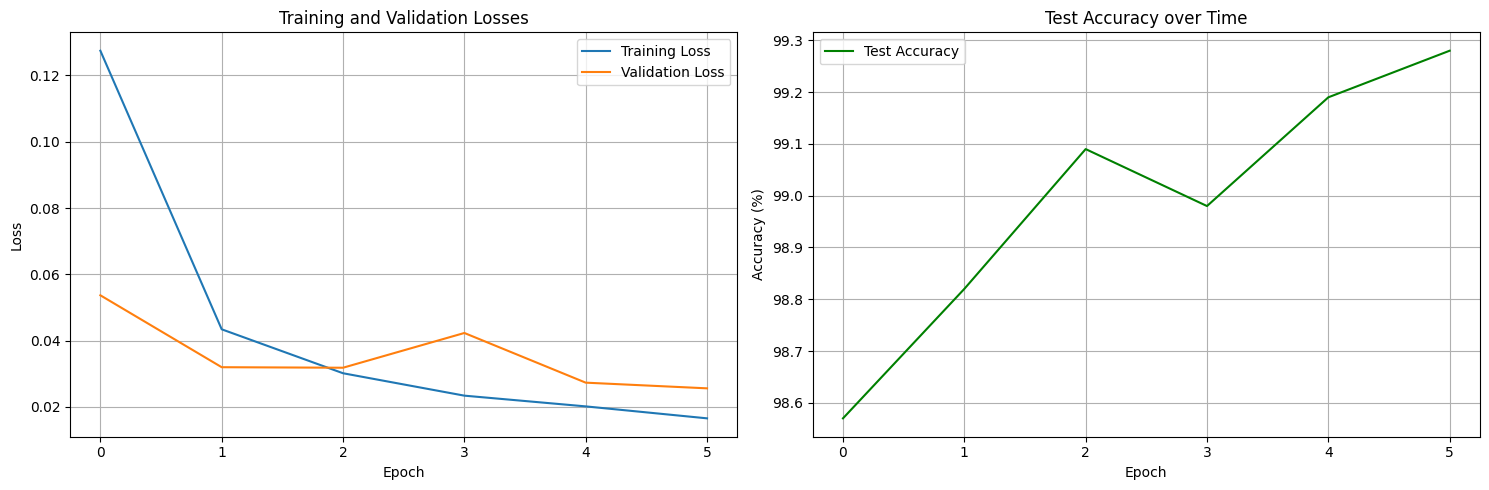


Final Metrics:
Best Test Accuracy: 99.28%
Final Training Loss: 0.0165
Final Validation Loss: 0.0256

Learning Convergence Analysis:
Total Epochs Trained: 6
Epoch with Best Performance: 6
Recent Improvement (last 5 epochs): 0.006202

Detailed Prediction Analysis:


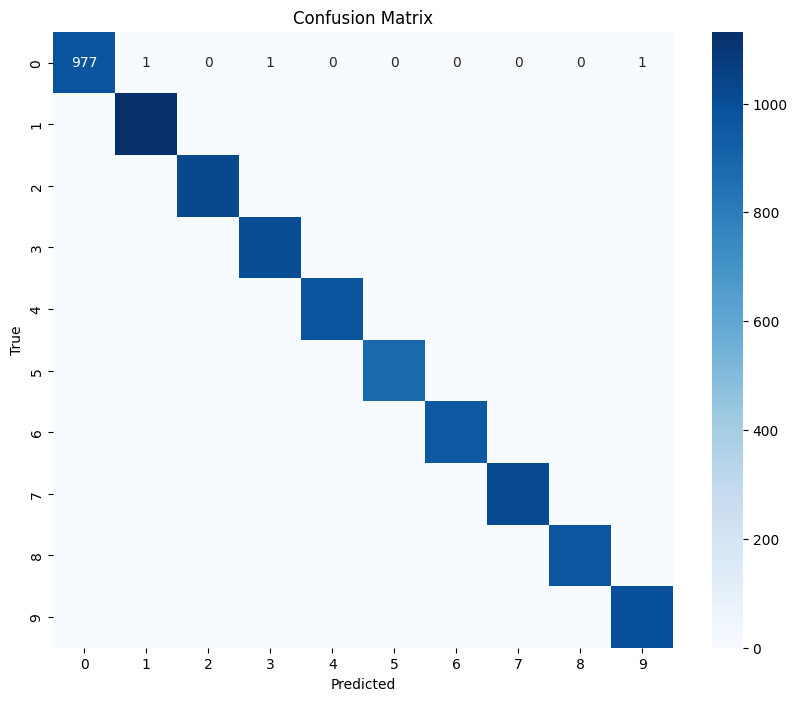

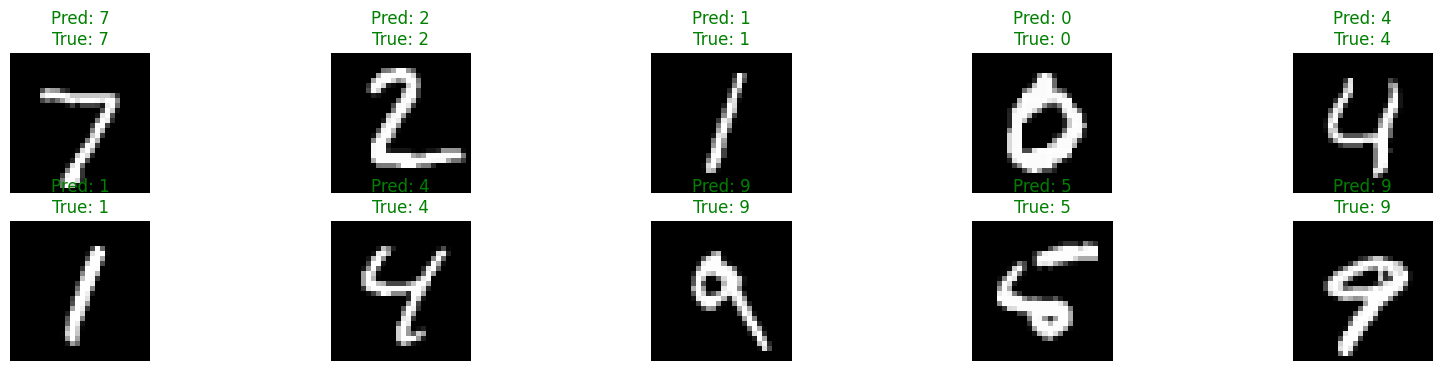


Per-class Analysis:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Model Complexity:
Total Parameters: 582,026
Trainable Parameters: 582,026


In [13]:
# After training:
# Then analyze performance using the same test_loader from trainer
trainer.analyze_performance()

The trained model performs pretty good. We create an app to test it with handwritten inputs by the user

In [14]:
# Then run the drawing application
# After training or loading your model
# model = MNISTConvNet.load('best_model.pth')  # Or use trainer.model after training
app = DigitDrawer(model)
app.run()

We now define the building blocks for aur sheafy neural network

We start with the nodes to edges function

In [15]:
# Check everythin works
x = torch.randn(1,1,9, requires_grad=True) # x shape: [batch_size, in_channels, m*n]
nte = NodestoEdges(3,3,1,1) # create class
y = nte(x) # transform
print("Shapes:", y.shape) # check shape

Shapes: torch.Size([1, 1, 12])


In [16]:
# Check that the sparsity pattern is correct for other grid sizes
nte = NodestoEdges(2,4,1,1)
print(nte.delta)
print(nte.delta.to_dense())


tensor(indices=tensor([[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 7, 8, 9, 6, 7, 8,
                        9],
                       [0, 1, 1, 2, 2, 3, 4, 5, 5, 6, 6, 7, 0, 1, 2, 3, 4, 5, 6,
                        7]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                      1., 1., 1., 1., 1., 1.]),
       size=(10, 8), nnz=20, layout=torch.sparse_coo)
tensor([[1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1.]])


In [17]:
# Check gradient is working properly
nte = NodestoEdges(3,3,1,1,bias=False)
x = torch.randn(1,1,9, requires_grad=True)
y = nte(x)
z = y.sum()
z.backward()
print(nte.weight.grad)  # Should show non-None gradients

# Print sparsity info
print(f"Total elements: {nte.delta.size(0) * nte.delta.size(1)}")
print(f"Non-zero elements: {nte.delta._nnz()}")
print(f"Sparsity: {1 - nte.delta._nnz()/(nte.delta.size(0) * nte.delta.size(1)):.2%}")

tensor([[[-0.8437, -1.3237, -1.3237,  0.0415,  0.3469,  0.0157,  0.0157,
          -0.1246, -0.7171, -0.5120, -0.5120, -0.2713, -0.8437,  0.3469,
          -1.3237,  0.0157,  0.0415, -0.1246,  0.3469, -0.7171,  0.0157,
          -0.5120, -0.1246, -0.2713]]])
Total elements: 108
Non-zero elements: 24
Sparsity: 77.78%


In [18]:
# Check the output is what it should be
channel_weights = nte.weight[0,0]
base_delta = nte.delta.coalesce()
indices = base_delta.indices()
channel_delta = torch.sparse_coo_tensor(
    indices,
    channel_weights,
    size=nte.delta.size()
)
y_man = torch.matmul(channel_delta.to_dense(), x.squeeze()) 
# Print zero if sparse multiplication is the same as dense multiplication
print(torch.sum(y_man - y))

tensor(-1.8626e-09, grad_fn=<SumBackward0>)


Now we try the edges to intersection function

In [19]:
# Test with 3x3 grid
eti = EdgestoInter(3,3,1,1)
print("Matrix shape:", eti.delta.size())  # Should be (4, 12) for 3x3 grid
                                         # 4 intersections, 12 edges

# Check sparsity
delta_coalesced = eti.delta.coalesce()
print("\nNon-zero entries:", delta_coalesced._nnz())
total_elements = delta_coalesced.size(0) * delta_coalesced.size(1)
sparsity = 1 - (delta_coalesced._nnz()/total_elements)
print(f"Sparsity: {sparsity:.2%}\n")
print(eti.delta.to_dense())


Matrix shape: torch.Size([4, 12])

Non-zero entries: 16
Sparsity: 66.67%

tensor([[1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.]])


Combine them together to have a function from nodes to intersections. You decrease dimension by first increasing it (nodes to edges) and then decreasing it (edges to intersections)

In [20]:
# Test with 3x3 grid
m = 3
n = 3
in_channels = 1
out_channels = 1
nte = NodestoEdges(m,n,in_channels,out_channels)
eti = EdgestoInter(m,n,in_channels,out_channels)

# Create new input tensor
x = torch.randn(in_channels,out_channels,m*n, requires_grad=True)

# Forward pass through both layers
y = nte(x)
print(y.size())
z = eti(y)
w = z.sum()

# Backward pass
w.backward()

# Print gradients
print("NodestoEdges weights grad:", nte.weight.grad)
print("EdgestoInter weights grad:", eti.weight.grad)

# Print sparsity info for both layers
print("\nNodestoEdges sparsity:")
print(f"Total elements: {nte.delta.size(0) * nte.delta.size(1)}")
print(f"Non-zero elements: {nte.delta._nnz()}")
print(f"Sparsity: {1 - nte.delta._nnz()/(nte.delta.size(0) * nte.delta.size(1)):.2%}")

print("\nEdgestoInter sparsity:")
print(f"Total elements: {eti.delta.size(0) * eti.delta.size(1)}")
print(f"Non-zero elements: {eti.delta._nnz()}")
print(f"Sparsity: {1 - eti.delta._nnz()/(eti.delta.size(0) * eti.delta.size(1)):.2%}")

torch.Size([1, 1, 12])
NodestoEdges weights grad: tensor([[[-0.0585, -0.1788, -0.2289, -0.3197, -0.3315, -0.1653,  0.2706,
          -0.5820,  0.0652, -0.3361,  0.0161,  0.0089, -0.0687, -0.3183,
           0.2427,  0.1834,  0.2434, -0.2831, -0.2770, -0.0683, -0.0822,
           0.2095, -0.0799, -0.0525]]])
EdgestoInter weights grad: tensor([[[ 0.0214, -0.2145, -0.3874,  0.2603, -0.1801, -0.1313,  0.2603,
          -0.3446, -0.2145, -0.1319,  0.1270,  0.2479, -0.1313,  0.3593,
           0.2479, -0.3573]]])

NodestoEdges sparsity:
Total elements: 108
Non-zero elements: 24
Sparsity: 77.78%

EdgestoInter sparsity:
Total elements: 48
Non-zero elements: 16
Sparsity: 66.67%


We check if there is a clear pattern we could take advantage of when defining our convolutional layer

In [21]:
def symbolic_matrix_with_pattern(m, n, indices_tensor, prefix='a'):
    matrix = sp.zeros(m, n)  # Start with m x n zero matrix
    
    # Convert indices tensor to list of tuples
    indices = list(zip(indices_tensor[0].tolist(), indices_tensor[1].tolist()))
    
    for i, j in indices:
        matrix[i, j] = sp.Symbol(f'{prefix}_{i},{j}')
    return matrix

In [22]:
# Check the sparsity pattern of the multiplication
m = 3
n = 3
in_channels = 1
out_channels = 1
nte = NodestoEdges(m,n,in_channels,out_channels)
eti = EdgestoInter(m,n,in_channels,out_channels)
nte_ix = nte.delta.coalesce().indices()
nte_W = symbolic_matrix_with_pattern(m*(n-1)+n*(m-1),m*n, nte_ix)
eti_ix = eti.delta.coalesce().indices()
eti_W = symbolic_matrix_with_pattern((n-1)*(m-1),m*(n-1)+n*(m-1), eti_ix,'b')
eti_W @ nte_W

Matrix([
[a_0,0*b_0,0 + a_6,0*b_0,6, a_0,1*b_0,0 + a_7,1*b_0,7,                         0, a_2,3*b_0,2 + a_6,3*b_0,6,   a_2,4*b_0,2 + a_7,4*b_0,7,                           0,                         0,                           0,                           0],
[                        0, a_1,1*b_1,1 + a_7,1*b_1,7, a_1,2*b_1,1 + a_8,2*b_1,8,                         0,   a_3,4*b_1,3 + a_7,4*b_1,7,   a_3,5*b_1,3 + a_8,5*b_1,8,                         0,                           0,                           0],
[                        0,                         0,                         0, a_2,3*b_2,2 + a_9,3*b_2,9, a_10,4*b_2,10 + a_2,4*b_2,2,                           0, a_4,6*b_2,4 + a_9,6*b_2,9, a_10,7*b_2,10 + a_4,7*b_2,4,                           0],
[                        0,                         0,                         0,                         0, a_10,4*b_3,10 + a_3,4*b_3,3, a_11,5*b_3,11 + a_3,5*b_3,3,                         0, a_10,7*b_3,10 + a_5,7*b_3,5, a_11,8*b_

In [23]:
# Checking the gradients are backpropagating properly
nte = NodestoEdges(3, 3, 2, 2)
x = torch.randn(1, 2, 9, requires_grad=True)
y = nte(x)
# Different weighting for different output channels
loss = y[:,0,:].sum() + 2*y[:,1,:].sum()  # Weight second channel differently
loss.backward()

print("Weight shape:", nte.weight.shape)
print("Gradient shape:", nte.weight.grad.shape)
print("\nAre gradients different for different channels?")
print("Input channel gradients differ:", 
      torch.any(nte.weight.grad[0,0] != nte.weight.grad[0,1]))
print("Output channel gradients differ:", 
      torch.any(nte.weight.grad[0,0] != nte.weight.grad[1,0]))

Weight shape: torch.Size([2, 2, 24])
Gradient shape: torch.Size([2, 2, 24])

Are gradients different for different channels?
Input channel gradients differ: tensor(True)
Output channel gradients differ: tensor(True)


In [24]:
print(nte.weight.grad[0,0])
print(nte.weight.grad[0,1])

tensor([ 0.0055, -0.8867, -0.8867, -0.6653,  0.6216, -0.6381, -0.6381, -0.5099,
         0.2155, -0.1123, -0.1123, -0.8041,  0.0055,  0.6216, -0.8867, -0.6381,
        -0.6653, -0.5099,  0.6216,  0.2155, -0.6381, -0.1123, -0.5099, -0.8041])
tensor([ 0.1843, -1.1351, -1.1351, -0.2187, -0.0473, -0.1640, -0.1640, -1.5386,
         1.0466, -1.0109, -1.0109,  0.8002,  0.1843, -0.0473, -1.1351, -0.1640,
        -0.2187, -1.5386, -0.0473,  1.0466, -0.1640, -1.0109, -1.5386,  0.8002])


In [25]:
# Test with multiple channels
eti = EdgestoInter(3, 3, 2, 2)  # 2 input channels, 2 output channels
x = torch.randn(1, 2, 12, requires_grad=True)  # Note: input size is 12 (edges) not 9 (pixels)
y = eti(x)

# Different weighting for output channels like before
loss = y[:,0,:].sum() + 2*y[:,1,:].sum()
loss.backward()

print("Weight shape:", eti.weight.shape)  # Should be [2, 2, 16] (4*k where k=4 for 3x3 grid)
print("Gradient shape:", eti.weight.grad.shape)
print("\nAre gradients different for different channels?")
print("Input channel gradients differ:", 
      torch.any(eti.weight.grad[0,0] != eti.weight.grad[0,1]))
print("Output channel gradients differ:", 
      torch.any(eti.weight.grad[0,0] != eti.weight.grad[1,0]))

# Check sparsity
base_delta = eti.delta.coalesce()
print("\nSparsity info:")
print(f"Total elements: {base_delta.size(0) * base_delta.size(1)}")
print(f"Non-zero elements: {base_delta._nnz()}")
print(f"Sparsity: {1 - base_delta._nnz()/(base_delta.size(0) * base_delta.size(1)):.2%}")

Weight shape: torch.Size([2, 2, 16])
Gradient shape: torch.Size([2, 2, 16])

Are gradients different for different channels?
Input channel gradients differ: tensor(True)
Output channel gradients differ: tensor(True)

Sparsity info:
Total elements: 48
Non-zero elements: 16
Sparsity: 66.67%


Now let's concatenate them

We create and test the sheafy convolutional block class SheafyConvBlock

In [26]:
# Using SheafConvBlock with default settings
basic_block = SheafyConvBlock(m=3, n=3, in_channels=1, out_channels=32)
print(basic_block)

SheafyConvBlock(
  (nodes_to_edges): NodestoEdges()
  (edges_to_inter): EdgestoInter()
)


In [27]:
# create some tests to check all the modes work
def test_sheafy_conv_block():
    # Test 1: Basic case with in_channels=1
    print("Test 1: Basic case (in_channels=1)")
    block1 = SheafyConvBlock(m=3, n=3, in_channels=1, out_channels=32)
    x1 = torch.randn(1, 1, 3, 3)  # batch_size=1, channels=1, height=3, width=3
    y1 = block1(x1)
    print(f"Input shape: {x1.shape}")
    print(f"Output shape: {y1.shape}")  # Should be [1, 32, 2, 2]
    
    # Test 2: Multiple input channels with mixing at the end
    print("\nTest 2: Multiple channels with end mixing")
    block2 = SheafyConvBlock(m=3, n=3, in_channels=16, out_channels=32, 
                           mix_middle=False, mix_end=True)
    x2 = torch.randn(1, 16, 3, 3)
    y2 = block2(x2)
    print(f"Input shape: {x2.shape}")
    print(f"Output shape: {y2.shape}")
    
    # Test 3: Mix in middle layer only
    print("\nTest 3: Mix in middle layer only")
    block3 = SheafyConvBlock(m=3, n=3, in_channels=16, out_channels=32,
                           mix_middle=True, mix_end=False)
    x3 = torch.randn(1, 16, 3, 3)
    y3 = block3(x3)
    print(f"Input shape: {x3.shape}")
    print(f"Output shape: {y3.shape}")
    
    # Test 4: No mixing case with matching channels
    print("\nTest 4: No mixing with matching channels")
    block4 = SheafyConvBlock(m=3, n=3, in_channels=16, out_channels=16,
                           mix_middle=False, mix_end=False)
    x4 = torch.randn(1, 16, 3, 3)
    y4 = block4(x4)
    print(f"Input shape: {x4.shape}")
    print(f"Output shape: {y4.shape}")
    
    # Test 5: No mixing case with different channels (should raise error)
    print("\nTest 5: No mixing with different channels")
    try:
        block5 = SheafyConvBlock(m=3, n=3, in_channels=16, out_channels=32, 
                               mix_middle=False, mix_end=False)
    except AssertionError as e:
        print(f"Caught expected error: {e}")
    
    # Test 6: Test backpropagation
    print("\nTest 6: Testing backpropagation")
    block6 = SheafyConvBlock(m=3, n=3, in_channels=1, out_channels=32)
    x6 = torch.randn(1, 1, 3, 3, requires_grad=True)
    y6 = block6(x6)
    loss = y6.sum()
    loss.backward()
    print(f"Input gradients exist: {x6.grad is not None}")
    print(f"nodes_to_edges weights gradients exist: {block6.nodes_to_edges.weight.grad is not None}")
    print(f"edges_to_inter weights gradients exist: {block6.edges_to_inter.weight.grad is not None}")
    
    # Test 7: Batch processing
    print("\nTest 7: Batch processing")
    block7 = SheafyConvBlock(m=3, n=3, in_channels=1, out_channels=32)
    x7 = torch.randn(64, 1, 3, 3)  # batch_size=64
    y7 = block7(x7)
    print(f"Input shape: {x7.shape}")
    print(f"Output shape: {y7.shape}")
    
    # Test 8: Different spatial dimensions
    print("\nTest 8: Different spatial dimensions")
    block8 = SheafyConvBlock(m=28, n=28, in_channels=1, out_channels=32)
    x8 = torch.randn(1, 1, 28, 28)  # typical MNIST image size
    y8 = block8(x8)
    print(f"Input shape: {x8.shape}")
    print(f"Output shape: {y8.shape}")
    
    # Test 9: Wrong spatial dimensions (should raise error)
    print("\nTest 9: Wrong spatial dimensions")
    block9 = SheafyConvBlock(m=3, n=3, in_channels=1, out_channels=32)
    x9 = torch.randn(1, 1, 4, 4)  # wrong size
    try:
        y9 = block9(x9)
    except AssertionError as e:
        print(f"Caught expected error: {e}")

# Run the tests
test_sheafy_conv_block()

Test 1: Basic case (in_channels=1)
Input shape: torch.Size([1, 1, 3, 3])
Output shape: torch.Size([1, 32, 2, 2])

Test 2: Multiple channels with end mixing
Input shape: torch.Size([1, 16, 3, 3])
Output shape: torch.Size([1, 32, 2, 2])

Test 3: Mix in middle layer only
Input shape: torch.Size([1, 16, 3, 3])
Output shape: torch.Size([1, 32, 2, 2])

Test 4: No mixing with matching channels
Input shape: torch.Size([1, 16, 3, 3])
Output shape: torch.Size([1, 16, 2, 2])

Test 5: No mixing with different channels
Caught expected error: When mix_middle=False and mix_end=False, in_channels must equal out_channels

Test 6: Testing backpropagation
Input gradients exist: True
nodes_to_edges weights gradients exist: True
edges_to_inter weights gradients exist: True

Test 7: Batch processing
Input shape: torch.Size([64, 1, 3, 3])
Output shape: torch.Size([64, 32, 2, 2])

Test 8: Different spatial dimensions
Input shape: torch.Size([1, 1, 28, 28])
Output shape: torch.Size([1, 32, 27, 27])

Test 9: Wr

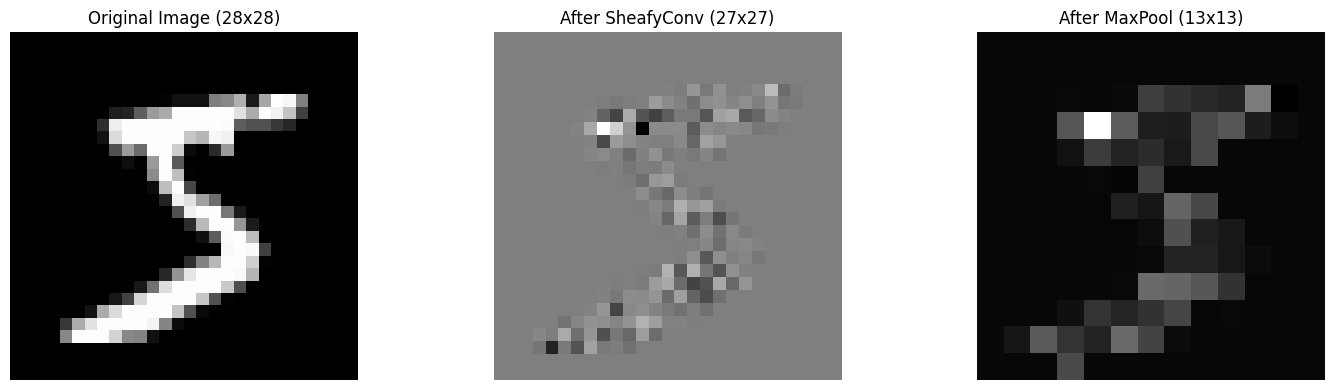

Original image shape: torch.Size([1, 28, 28])
Input shape (with batch dim): torch.Size([1, 1, 28, 28])
After SheafyConv shape: torch.Size([1, 32, 27, 27])
After MaxPool shape: torch.Size([1, 32, 13, 13])


In [28]:
# Check the output of an image to see we have handle the dimensions correctly

# Load MNIST dataset and get one image
transform = transforms.ToTensor()
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, 
                                         download=True, transform=transform)
image, _ = mnist_dataset[0]  # Get first image

# Create a small network with SheafyConvBlock and MaxPool2d
class SmallSheafyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = SheafyConvBlock(m=28, n=28, in_channels=1, out_channels=32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.pool(x)
        return x

# Create network and process image
net = SmallSheafyNet()
with torch.no_grad():  # No need for gradients in visualization
    x = image.unsqueeze(0)  # Add batch dimension: [1, 1, 28, 28]
    conv_out = net.conv(x)
    pooled_out = net.pool(conv_out)

# Setup the plot
plt.figure(figsize=(15, 4))

# Show original image
plt.subplot(131)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image (28x28)')
plt.axis('off')

# Show output after sheafy convolution (show first channel)
plt.subplot(132)
plt.imshow(conv_out[0, 0].detach(), cmap='gray')
plt.title('After SheafyConv (27x27)')
plt.axis('off')

# Show output after pooling (show first channel)
plt.subplot(133)
plt.imshow(pooled_out[0, 0].detach(), cmap='gray')
plt.title('After MaxPool (13x13)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print shapes at each step
print(f"Original image shape: {image.shape}")
print(f"Input shape (with batch dim): {x.shape}")
print(f"After SheafyConv shape: {conv_out.shape}")
print(f"After MaxPool shape: {pooled_out.shape}")

Now we define and test the sheafy neural network class SheafyNet

In [29]:
# Define some tests to check everything works

def test_sheafy_net():
    # Test 1: Basic instantiation with default parameters
    print("Test 1: Basic instantiation")
    net1 = SheafyNet()
    net1.print_model_info("Default SheafyNet")
    x1 = torch.randn(1, 1, 28, 28)  # Single MNIST image
    y1 = net1(x1)
    print(f"Input shape: {x1.shape}")
    print(f"Output shape: {y1.shape}")
    
    # Test 2: Custom architecture
    print("\nTest 2: Custom architecture")
    net2 = SheafyNet(
        in_channels=1,
        sheafy_channels=[16, 32, 64],  # Three sheafy layers
        mix_middle=True,
        mix_end=False,
        inner_bias=True,
        inner_activation=F.relu,
        fc_features=[256, 128],  # Two FC layers
        input_size=28
    )
    net2.print_model_info("Custom SheafyNet")
    x2 = torch.randn(1, 1, 28, 28)
    y2 = net2(x2)
    print(f"Input shape: {x2.shape}")
    print(f"Output shape: {y2.shape}")
    
    # Test 3: Different mixing strategies per layer
    print("\nTest 3: Different mixing strategies")
    net3 = SheafyNet(
        sheafy_channels=[16, 32],
        mix_middle=[True, False],
        mix_end=[False, True],
        inner_bias=[True, False]
    )
    net3.print_model_info("Mixed strategies SheafyNet")
    
    # Test 4: Batch processing
    print("\nTest 4: Batch processing")
    net4 = SheafyNet()
    x4 = torch.randn(64, 1, 28, 28)  # batch_size=64
    y4 = net4(x4)
    print(f"Input shape: {x4.shape}")
    print(f"Output shape: {y4.shape}")
    
    # Test 5: Test backpropagation
    print("\nTest 5: Testing backpropagation")
    net5 = SheafyNet()
    x5 = torch.randn(1, 1, 28, 28, requires_grad=True)
    y5 = net5(x5)
    loss = y5.sum()
    loss.backward()
    print(f"Input gradients exist: {x5.grad is not None}")
    print(f"First sheafy layer weights have gradients: {net5.sheafy_layers[0].nodes_to_edges.weight.grad is not None}")
    print(f"First FC layer weights have gradients: {net5.fc_layers[0].weight.grad is not None}")
    
    # Test 6: Size calculation verification
    print("\nTest 6: Size calculation verification")
    net6 = SheafyNet(sheafy_channels=[32, 64])
    sizes = []
    x6 = torch.randn(1, 1, 28, 28)
    
    # Track sizes through the network
    sizes.append(x6.size())
    x = x6
    for i, layer in enumerate(net6.sheafy_layers):
        x = layer(x)
        sizes.append(x.size())
        x = net6.activation(x)
        x = net6.pool(x)
        sizes.append(x.size())
    
    print("Size progression through network:")
    for i, size in enumerate(sizes):
        if i == 0:
            print(f"Input: {size}")
        elif i % 2 == 1:
            print(f"After sheafy layer {i//2}: {size}")
        else:
            print(f"After pooling {(i-1)//2}: {size}")
    
    # Test 7: Save and load
    print("\nTest 7: Save and load functionality")
    net7 = SheafyNet()
    net7.eval()  # Set to evaluation mode
    x7 = torch.randn(1, 1, 28, 28)
    
    with torch.no_grad():  # Disable gradient computation
        y7_before = net7(x7)
        
        # Save and load
        net7.save("test_model.pth")
        loaded_net = SheafyNet.load("test_model.pth")
        loaded_net.eval()  # Set loaded model to evaluation mode
        y7_after = loaded_net(x7)
        
        print(f"Outputs match after save/load: {torch.allclose(y7_before, y7_after, rtol=1e-4, atol=1e-4)}")
    
    # Clean up
    import os
    if os.path.exists("test_model.pth"):
        os.remove("test_model.pth")

# Run the tests
if __name__ == "__main__":
    test_sheafy_net()

Test 1: Basic instantiation

Default SheafyNet:
SheafyNet(
  (sheafy_layers): ModuleList(
    (0-1): 2 x SheafyConvBlock(
      (nodes_to_edges): NodestoEdges()
      (edges_to_inter): EdgestoInter()
    )
  )
  (fc_layers): ModuleList(
    (0): Linear(in_features=2304, out_features=512, bias=True)
  )
  (fc_out): Linear(in_features=512, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
)
Total parameters: 2,481,338
Input shape: torch.Size([1, 1, 28, 28])
Output shape: torch.Size([1, 10])

Test 2: Custom architecture

Custom SheafyNet:
SheafyNet(
  (sheafy_layers): ModuleList(
    (0-2): 3 x SheafyConvBlock(
      (nodes_to_edges): NodestoEdges()
      (edges_to_inter): EdgestoInter()
    )
  )
  (fc_layers): ModuleList(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
  )
  (fc_out): Linear(in_features=128

c:\Users\vicen\Documents\PhD\classes\GNNs\SCNN.py:1189: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Outputs match after save/load: True


In [30]:
# # Already done
# # 2. Set random seed for reproducibility
# torch.manual_seed(42)

# # 3. Define transforms and load datasets
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.1307,), (0.3081,))  # MNIST specific mean and std
# ])

# # Load MNIST dataset
# train_dataset = torchvision.datasets.MNIST(
#     root='./data', 
#     train=True,
#     download=True,
#     transform=transform
# )

# test_dataset = torchvision.datasets.MNIST(
#     root='./data', 
#     train=False,
#     download=True,
#     transform=transform
# )



We load an already trained model. For the training process see commented code below

In [31]:
# First load the model
sheafy_model = SheafyNet.load('sheafy_model_small_2_layers.pth')
sheafy_model.print_model_info("SheafyNet Model")

# Then create a trainer with this model
sheafy_trainer = create_trainer(sheafy_model, train_dataset, test_dataset)

# Finally load the training state
sheafy_trainer.load_training_state('sheafy_model_small_2_layers_training.pth')


SheafyNet Model:
SheafyNet(
  (sheafy_layers): ModuleList(
    (0-1): 2 x SheafyConvBlock(
      (nodes_to_edges): NodestoEdges()
      (edges_to_inter): EdgestoInter()
    )
  )
  (fc_layers): ModuleList(
    (0): Linear(in_features=1152, out_features=512, bias=True)
  )
  (fc_out): Linear(in_features=512, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
)
Total parameters: 950,090


c:\Users\vicen\Documents\PhD\classes\GNNs\SCNN.py:358: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


In [32]:
# # 4. Create SheafyNet model
# sheafy_model = SheafyNet(sheafy_channels=[16,32])
# # 5. Create trainer
# sheafy_trainer = create_trainer(
#     model=sheafy_model,
#     train_dataset=train_dataset,
#     test_dataset=test_dataset,
#     batch_size=64,
#     learning_rate=0.001,
#     patience=5
# )
# # 6. Print model information
# sheafy_model.print_model_info("SheafyNet Model")

# output
# SheafyNet Model:
# SheafyNet(
#   (sheafy_layers): ModuleList(
#     (0-1): 2 x SheafyConvBlock(
#       (nodes_to_edges): NodestoEdges()
#       (edges_to_inter): EdgestoInter()
#     )
#   )
#   (fc_layers): ModuleList(
#     (0): Linear(in_features=1152, out_features=512, bias=True)
#   )
#   (fc_out): Linear(in_features=512, out_features=10, bias=True)
#   (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
#   (dropout): Dropout(p=0.25, inplace=False)
# )
# Total parameters: 950,090

In [33]:
# # 7. Train the model
# train_losses, val_losses, test_accuracies = sheafy_trainer.train(
#     epochs=20, 
#     save_path='sheafy_model_small_2_layers.pth'
# )

Model Performance Analysis


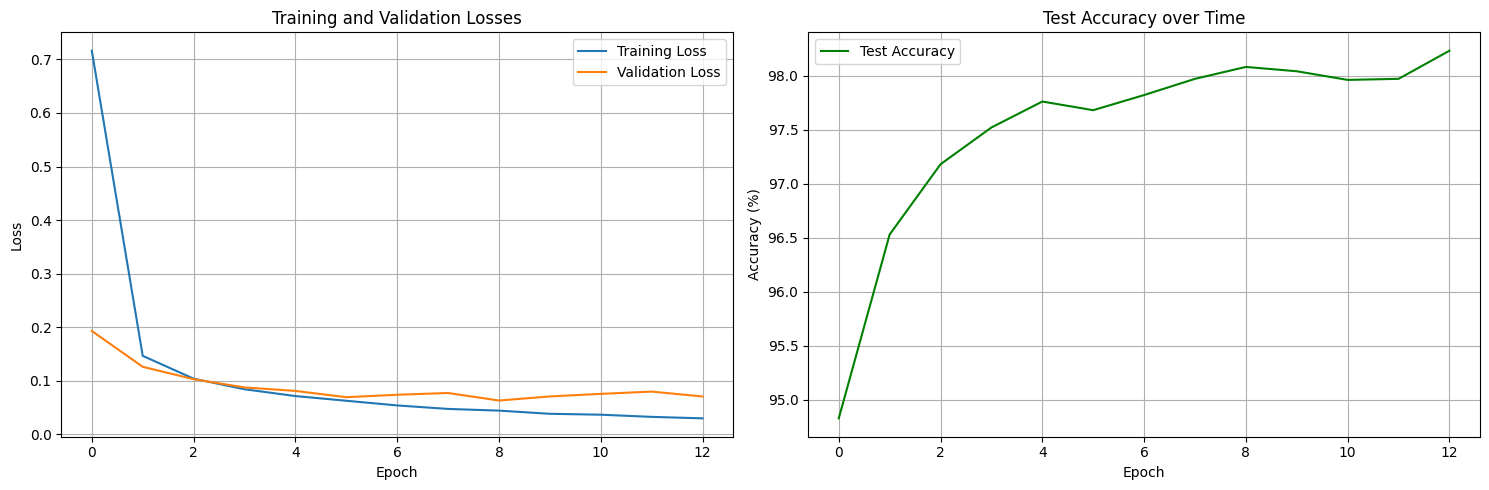


Final Metrics:
Best Test Accuracy: 98.23%
Final Training Loss: 0.0300
Final Validation Loss: 0.0708

Learning Convergence Analysis:
Total Epochs Trained: 13
Epoch with Best Performance: 13
Recent Improvement (last 5 epochs): 0.001288

Detailed Prediction Analysis:


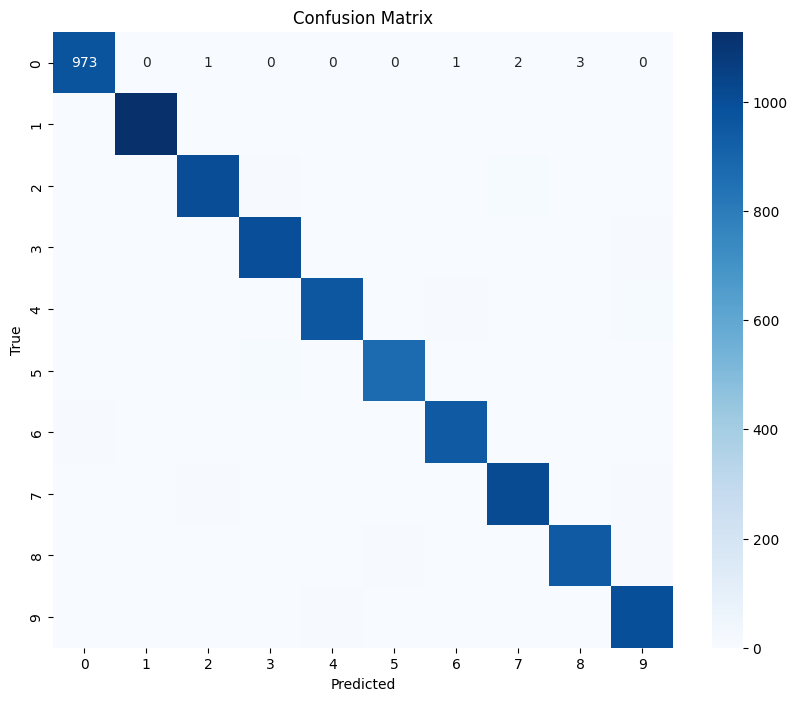

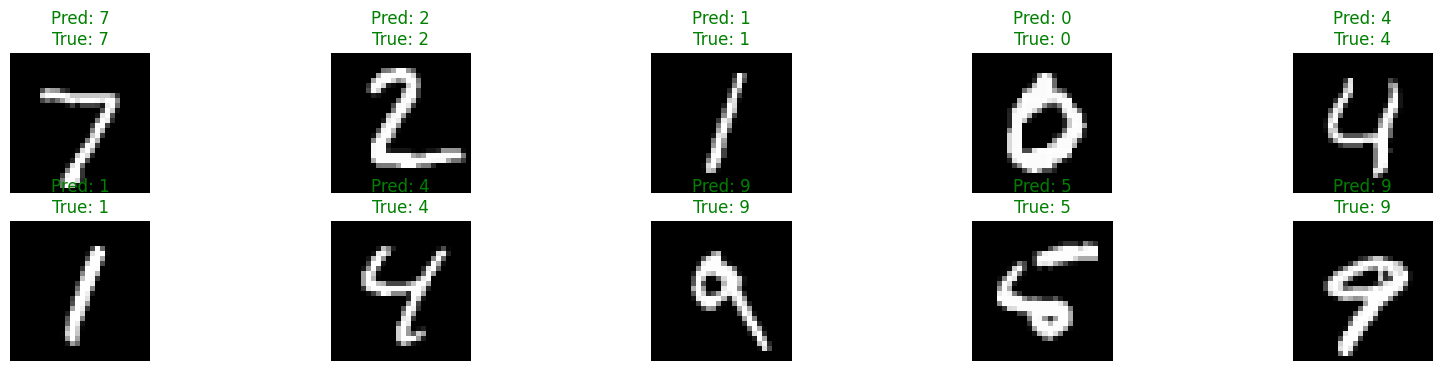


Per-class Analysis:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Model Complexity:
Total Parameters: 950,090
Trainable Parameters: 950,090


In [34]:
# 8. Analyze performance
sheafy_trainer.analyze_performance()

The model performs decently but worse than the regular CNN. It has also more parameters and it is curently slower. The more parameters part is something that can be argued. The slower part is something that can be fixed by properly implementing some sparse multiplications (in te process)

In [35]:
# Then run the drawing application
# After training or loading your model
# model = MNISTConvNet.load('best_model.pth')  # Or use trainer.model after training
app = DigitDrawer(sheafy_model)
app.run()

## Developing... 

Ignore below

In [36]:
class SheafyConvBlock(nn.Module):
    def __init__(self, m, n, in_channels, out_channels, bias=True, 
                 mix_middle=False, mix_end=True, inner_bias=False, 
                 inner_activation=None):
        super().__init__()

        self.m = m
        self.n = n

        # Check that channels match when no mixing is allowed
        if not mix_middle and not mix_end and in_channels != out_channels:
            raise AssertionError("When mix_middle=False and mix_end=False, in_channels must equal out_channels")

        # Determine the number of middle channels
        # when in_channels = 1 is recommendable to set mix_middle=True
        # to exapand the dimension from the first layer
        # when in_channels > 1 keep everything by default
        if mix_middle:
            mid_channels = out_channels
        else:
            mid_channels = in_channels
        
        # Create the layers
        self.nodes_to_edges = NodestoEdges(
            m=m, n=n, 
            in_channels=in_channels, 
            out_channels=mid_channels,
            mix_channels=mix_middle,
            bias=inner_bias  # Changed from bias=inner_bias to just bias=inner_bias
        )

        # when mix_middle=True, it is recommendable to set mix_end=False
        # to keep things parallel and avoid mixing twice
        self.edges_to_inter = EdgestoInter(
            m=m, n=n,
            in_channels=mid_channels,
            out_channels=out_channels,
            mix_channels=mix_end,
            bias=bias
        )
        
        # Optional inner activation
        self.inner_activation = inner_activation
        
    
    def forward(self, x):
        import time
        start = time.time()
        
        # Input shape: [batch_size, channels, H, W]
        batch_size, channels, H, W = x.size()
        
        # Flatten spatial dimensions
        x = x.view(batch_size, channels, -1)
        t1 = time.time()
        print(f"Flatten time: {t1 - start:.4f}s")
        
        # Apply sheaf operations
        x = self.nodes_to_edges(x)
        t2 = time.time()
        print(f"Nodes to edges time: {t2 - t1:.4f}s")
        
        if self.inner_activation is not None:
            x = self.inner_activation(x)
        t3 = time.time()
        print(f"Inner activation time: {t3 - t2:.4f}s")
        
        x = self.edges_to_inter(x)
        t4 = time.time()
        print(f"Edges to inter time: {t4 - t3:.4f}s")
        
        # Reshape back to 2D
        x = x.view(batch_size, -1, self.m-1, self.n-1)
        end = time.time()
        print(f"Reshape time: {end - t4:.4f}s")
        print(f"Total block time: {end - start:.4f}s")
        
        return x

In [37]:
# First, let's try a smaller batch to see if the processing is happening
sheafy_trainer = create_trainer(
    model=sheafy_model,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    batch_size=32,  # Reduced from 64
    learning_rate=0.001,
    patience=5
)

# Before training, let's verify data is loading correctly
print("Checking data loaders:")
print(f"Training batches: {len(sheafy_trainer.train_loader)}")
print(f"Validation batches: {len(sheafy_trainer.val_loader)}")
print(f"Test batches: {len(sheafy_trainer.test_loader)}")

# Add a small test forward pass
print("\nTesting one batch:")
for batch_idx, (data, target) in enumerate(sheafy_trainer.train_loader):
    print(f"Batch {batch_idx} shape: {data.shape}")
    output = sheafy_model(data)
    print(f"Output shape: {output.shape}")
    if batch_idx == 0:  # Just test first batch
        break

Checking data loaders:
Training batches: 1688
Validation batches: 188
Test batches: 313

Testing one batch:
Batch 0 shape: torch.Size([32, 1, 28, 28])
Output shape: torch.Size([32, 10])


In [38]:
print("\nTesting one batch with timing:")
for batch_idx, (data, target) in enumerate(sheafy_trainer.train_loader):
    print(f"\nProcessing batch {batch_idx}:")
    import time
    start = time.time()
    
    print(f"Input shape: {data.shape}")
    x = sheafy_model.sheafy_layers[0](data)  # Time first sheafy layer
    t1 = time.time()
    print(f"First sheafy layer time: {t1 - start:.4f}s")
    
    x = sheafy_model.activation(x)
    x = sheafy_model.pool(x)
    t2 = time.time()
    print(f"First activation and pool time: {t2 - t1:.4f}s")
    
    x = sheafy_model.sheafy_layers[1](x)  # Time second sheafy layer
    t3 = time.time()
    print(f"Second sheafy layer time: {t3 - t2:.4f}s")
    
    x = sheafy_model.activation(x)
    x = sheafy_model.pool(x)
    t4 = time.time()
    print(f"Second activation and pool time: {t4 - t3:.4f}s")
    
    x = x.view(-1, sheafy_model.flatten_size)
    t5 = time.time()
    print(f"Flatten time: {t5 - t4:.4f}s")
    
    for fc in sheafy_model.fc_layers:
        x = fc(x)
        x = sheafy_model.activation(x)
        x = sheafy_model.dropout(x)
    t6 = time.time()
    print(f"FC layers time: {t6 - t5:.4f}s")
    
    output = sheafy_model.fc_out(x)
    output = F.log_softmax(output, dim=1)
    end = time.time()
    print(f"Output layer time: {end - t6:.4f}s")
    
    print(f"\nTotal forward pass time: {end - start:.4f}s")
    print(f"Output shape: {output.shape}")
    
    if batch_idx == 0:  # Just test first batch
        break


Testing one batch with timing:

Processing batch 0:
Input shape: torch.Size([32, 1, 28, 28])
First sheafy layer time: 0.0094s
First activation and pool time: 0.0015s
Second sheafy layer time: 0.0726s
Second activation and pool time: 0.0000s
Flatten time: 0.0000s
FC layers time: 0.0010s
Output layer time: 0.0050s

Total forward pass time: 0.0895s
Output shape: torch.Size([32, 10])


In [39]:
def test_sheafy_block():
    # Create a small test input
    batch_size = 32
    in_channels = 16
    m, n = 28, 28  # MNIST image size
    
    # Initialize the block
    block = SheafyConvBlock(
        m=m, 
        n=n, 
        in_channels=in_channels,
        out_channels=32,
        inner_activation=torch.nn.ReLU()
    )
    
    # Create random input tensor
    x = torch.randn(batch_size, in_channels, m, n)
    
    # Move to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    block = block.to(device)
    x = x.to(device)
    
    print(f"Running on {device}")
    print(f"Input shape: {x.shape}")
    
    # Warm-up run
    with torch.no_grad():
        _ = block(x)
    
    # Actual test run
    with torch.no_grad():
        output = block(x)
    
    print(f"Output shape: {output.shape}")

# Run the test
test_sheafy_block()

Running on cpu
Input shape: torch.Size([32, 16, 28, 28])
Flatten time: 0.0000s
Nodes to edges time: 0.0582s
Inner activation time: 0.0010s
Edges to inter time: 0.2808s
Reshape time: 0.0000s
Total block time: 0.3400s
Flatten time: 0.0013s
Nodes to edges time: 0.0040s
Inner activation time: 0.0010s
Edges to inter time: 0.2155s
Reshape time: 0.0000s
Total block time: 0.2218s
Output shape: torch.Size([32, 32, 27, 27])


In [40]:
def run_timing_tests():
    batch_sizes = [1, 16, 32, 64]
    channel_sizes = [1, 16, 32, 64]
    
    for batch_size in batch_sizes:
        for in_channels in channel_sizes:
            print(f"\nTesting with batch_size={batch_size}, in_channels={in_channels}")
            block = SheafyConvBlock(
                m=28, 
                n=28, 
                in_channels=in_channels,
                out_channels=in_channels,  # Keep same size for simplicity
                inner_activation=torch.nn.ReLU()
            )
            x = torch.randn(batch_size, in_channels, 28, 28)
            
            device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
            block = block.to(device)
            x = x.to(device)
            
            # Warm-up
            with torch.no_grad():
                _ = block(x)
            
            # Test run
            with torch.no_grad():
                _ = block(x)

# Run comprehensive tests
run_timing_tests()


Testing with batch_size=1, in_channels=1
Flatten time: 0.0000s
Nodes to edges time: 0.0020s
Inner activation time: 0.0000s
Edges to inter time: 0.0010s
Reshape time: 0.0000s
Total block time: 0.0030s
Flatten time: 0.0000s
Nodes to edges time: 0.0020s
Inner activation time: 0.0000s
Edges to inter time: 0.0000s
Reshape time: 0.0000s
Total block time: 0.0020s

Testing with batch_size=1, in_channels=16
Flatten time: 0.0000s
Nodes to edges time: 0.0082s
Inner activation time: 0.0000s
Edges to inter time: 0.0553s
Reshape time: 0.0000s
Total block time: 0.0635s
Flatten time: 0.0000s
Nodes to edges time: 0.0042s
Inner activation time: 0.0000s
Edges to inter time: 0.0602s
Reshape time: 0.0000s
Total block time: 0.0644s

Testing with batch_size=1, in_channels=32
Flatten time: 0.0011s
Nodes to edges time: 0.0030s
Inner activation time: 0.0000s
Edges to inter time: 0.3430s
Reshape time: 0.0000s
Total block time: 0.3471s
Flatten time: 0.0000s
Nodes to edges time: 0.0056s
Inner activation time: 0.0

It is clear that the problem comes when we expand to several channels in the edges to intersections functions. This is because of the nested for loops that could be easily parallelized. The problem is that we would like to take advantadge of the sparse multiplications algorithms, but currently higher dimension tensor multiplication is not supported for sparse tensors. But this could be easily implemented I beleive.